### Neshyba & de Miguel, 2023


# Thermophoretic Forces

## Introduction

$$
h \nu = \hbar \omega
$$

$$
\omega = 2 \pi \nu
$$

## The idea of this exericse

## Learning goals
The main learning goals of this exercise are 
1. I can ...

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Constants
R = AssignQuantity(8.314,'joule/mol/K')
NA = AssignQuantity(6.02e23,'1/mol')
kB = R/NA
c = AssignQuantity(3.0e8,'m/s')
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree'); print(hbar)
h = hbar*2*np.pi; print(h)

1 atomic_unit_of_time * hartree
6.283185307179586 atomic_unit_of_time * hartree


In [3]:
# Specifying the temperature range across our gradient
nx = 500

# # These parameters produce a thermophylic force around 250 K
# T_low = AssignQuantity(150,'K')
# T_high = AssignQuantity(300,'K')
# T_transition = AssignQuantity(250,'K')
# T_interval = AssignQuantity(3,'K')
# nubar0 = AssignQuantity(1014,'1/cm')
# nubar_HT = nubar0; print('nubar_HT =', nubar_HT)
# LT_enhancement = 20
# nubar_LT = nubar0*(1 + LT_enhancement/100)

# These parameters produce a thermophylic force around 250 K
T_low = AssignQuantity(150,'K')
T_high = AssignQuantity(300,'K')
T_transition = AssignQuantity(250,'K')
T_interval = AssignQuantity(3,'K')
nubar0 = AssignQuantity(1014,'1/cm')
nubar_HT = nubar0; print('nubar_HT =', nubar_HT)
LT_enhancement = 4.47
nubar_LT = nubar0*(1 + LT_enhancement/100)

# # These parameters produce a thermophylic force around 250 K
# T_low = AssignQuantity(150,'K')
# T_high = AssignQuantity(300,'K')
# T_transition = AssignQuantity(250,'K')
# T_interval = AssignQuantity(3,'K')
# nubar0 = AssignQuantity(1014,'1/cm')
# nubar_HT = nubar0; print('nubar_HT =', nubar_HT)
# LT_enhancement = 4.47
# nubar_LT = nubar0*(1 + LT_enhancement/100)

# # These parameters produce a thermophylic force around 200 K
# T_low = AssignQuantity(150,'K')
# T_high = AssignQuantity(300,'K')
# T_transition = AssignQuantity(200,'K')
# T_interval = AssignQuantity(3,'K')
# nubar0 = AssignQuantity(1014,'1/cm')
# nubar_HT = nubar0; print('nubar_HT =', nubar_HT)
# LT_enhancement = 4.47
# nubar_LT = nubar0*(1 + LT_enhancement/100)

print('nubar at low T=', nubar_LT)
print('nubar at high T=', nubar_HT)

xarray = AssignQuantity(np.linspace(0,1,nx),'cm')
Tarray = np.linspace(T_low,T_high,nx)

nubar_HT = 1014 / centimeter
nubar at low T= 1059.3258 / centimeter
nubar at high T= 1014 / centimeter


In [4]:
nubar0 = AssignQuantity(1014,'1/cm')
nu0 = nubar0*c; nu0.ito('1/s')
omega0 = nu0*(2*np.pi)
print(nubar0)
print(nu0)
print(omega0)

1014 / centimeter
30420000000000.0 / second
191134497044403.0 / second


In [5]:
def Z_HO(omega, T, nmax=20):
    Z = 0
    Zterms = []
    for n in range(0,nmax):
        deltaE = n*hbar*omega
        argument = deltaE/kB/T
        argument.ito('dimensionless')
        nextone = np.exp(-argument)
        Z += nextone
        Zterms = np.append(Zterms,nextone) # For internal use only -- not returned
    return Z

<IPython.core.display.Javascript object>


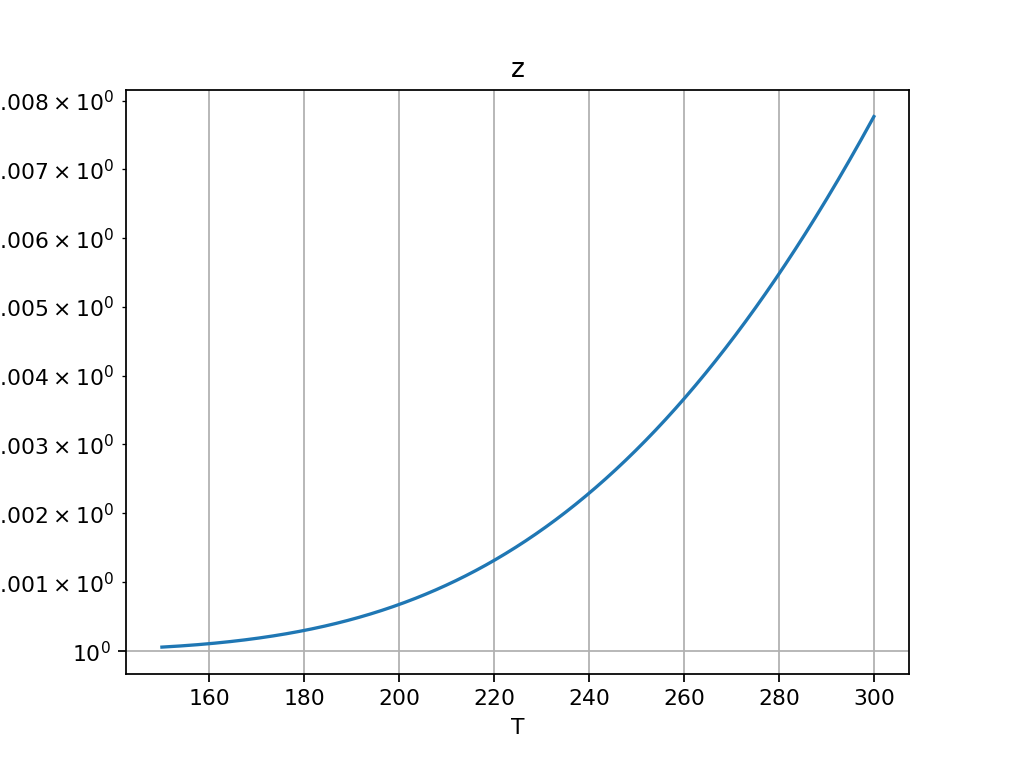

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


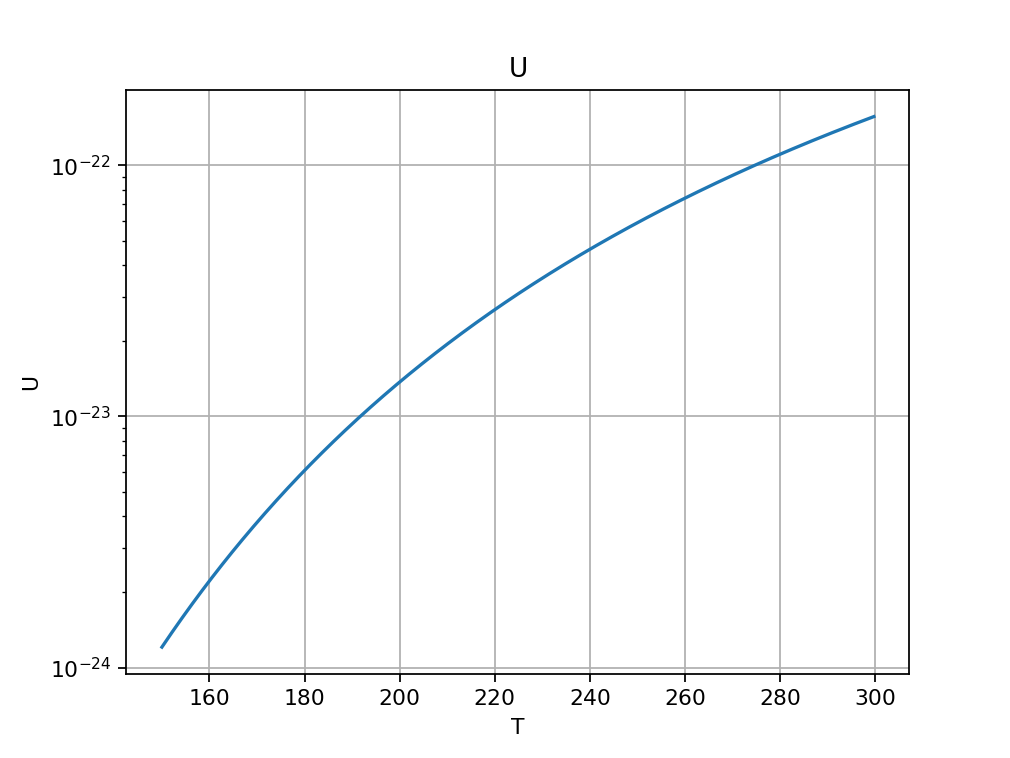

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


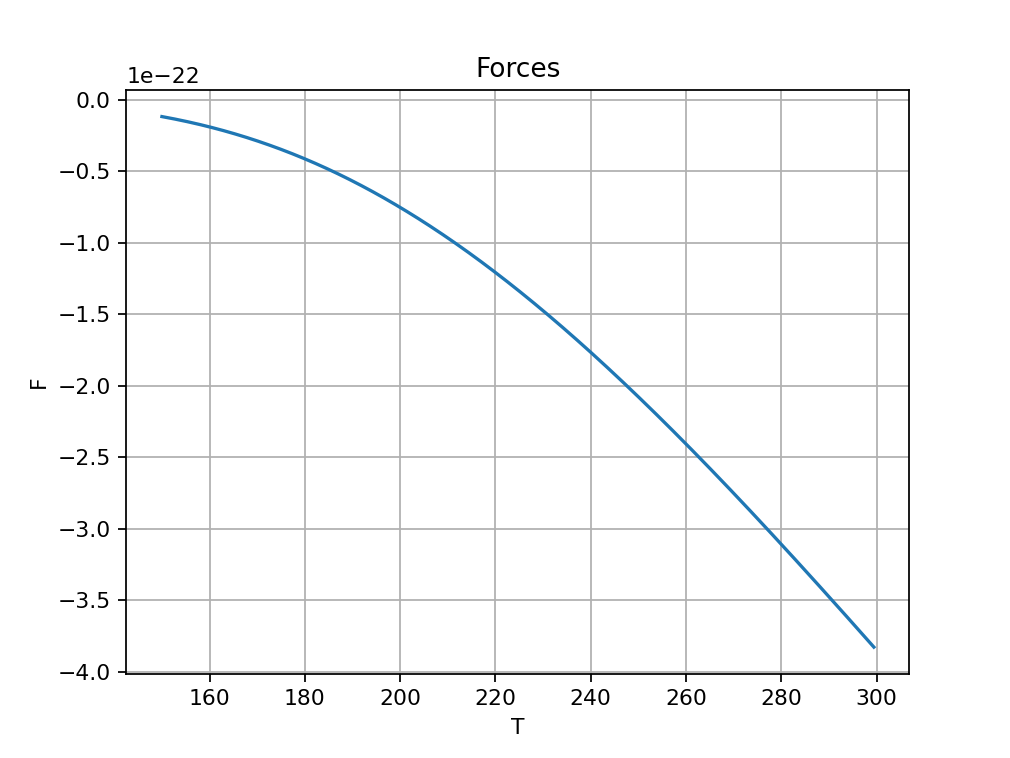

-1.1826431066715413e-23


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [6]:
# Getting Z(T)
Zarray = []
for T in Tarray:
    Z = Z_HO(omega0,T)
    Zarray = np.append(Zarray,Z)
plt.figure()
plt.semilogy(Tarray,Zarray)
plt.grid(True)
plt.xlabel('T')
plt.ylabel('Z')
plt.title('z')

# Getting U(T)
lnZ = np.log(Zarray)
Uarray = kB*Tarray[:-1]**2*np.diff(lnZ)/np.diff(Tarray)
plt.figure()
plt.semilogy(Tarray[:-1],Uarray)
plt.grid(True)
plt.xlabel('T')
plt.ylabel('U')
plt.title('U')

# Getting F(x)
Farray = -np.diff(Uarray)/np.diff(xarray[0:-1])
plt.figure()
plt.plot(Tarray[:-2],Farray)
plt.grid(True)
plt.xlabel('T')
plt.ylabel('F')
plt.title('Forces')
print(np.max(Farray.magnitude))

<IPython.core.display.Javascript object>


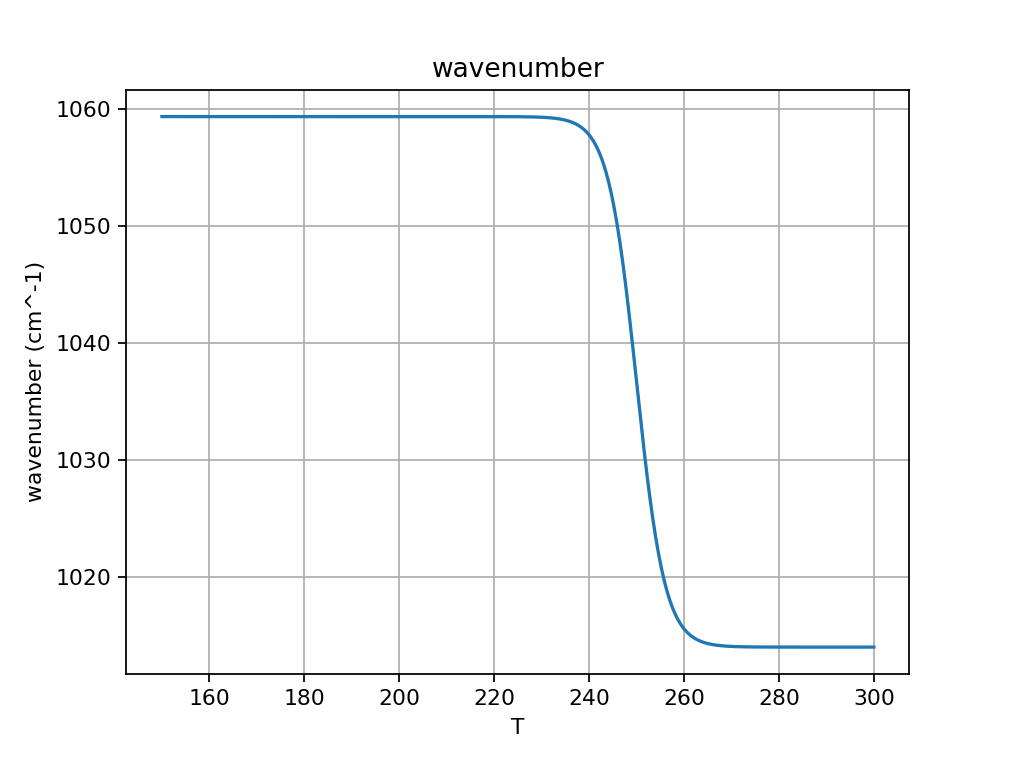

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


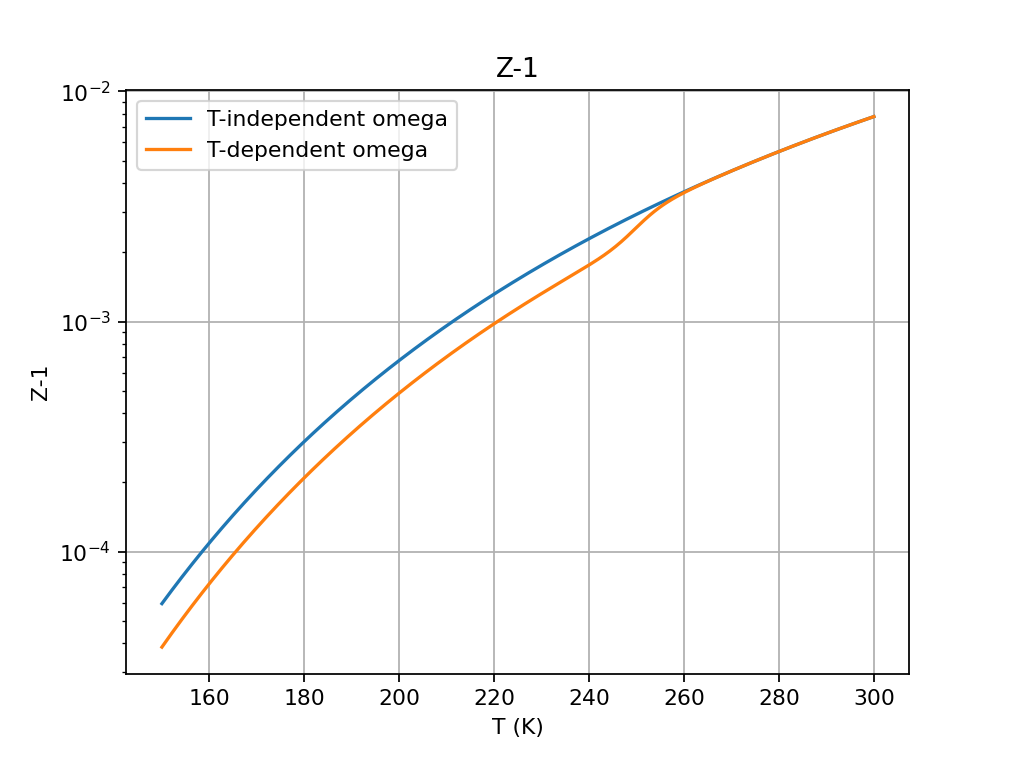

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


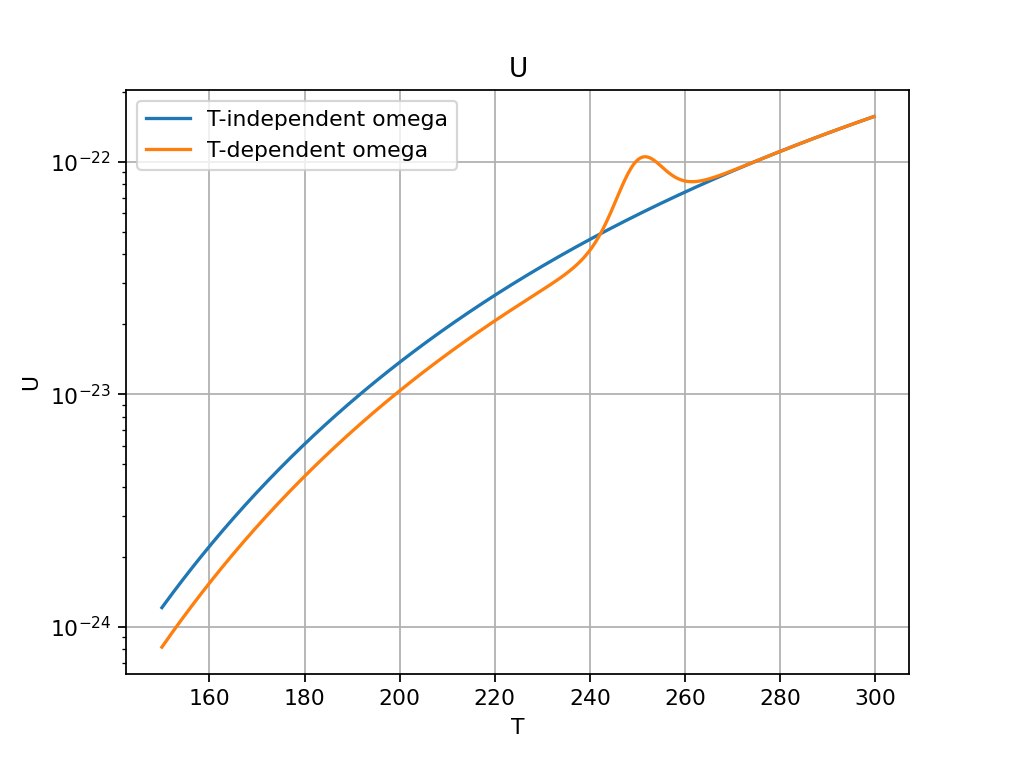

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


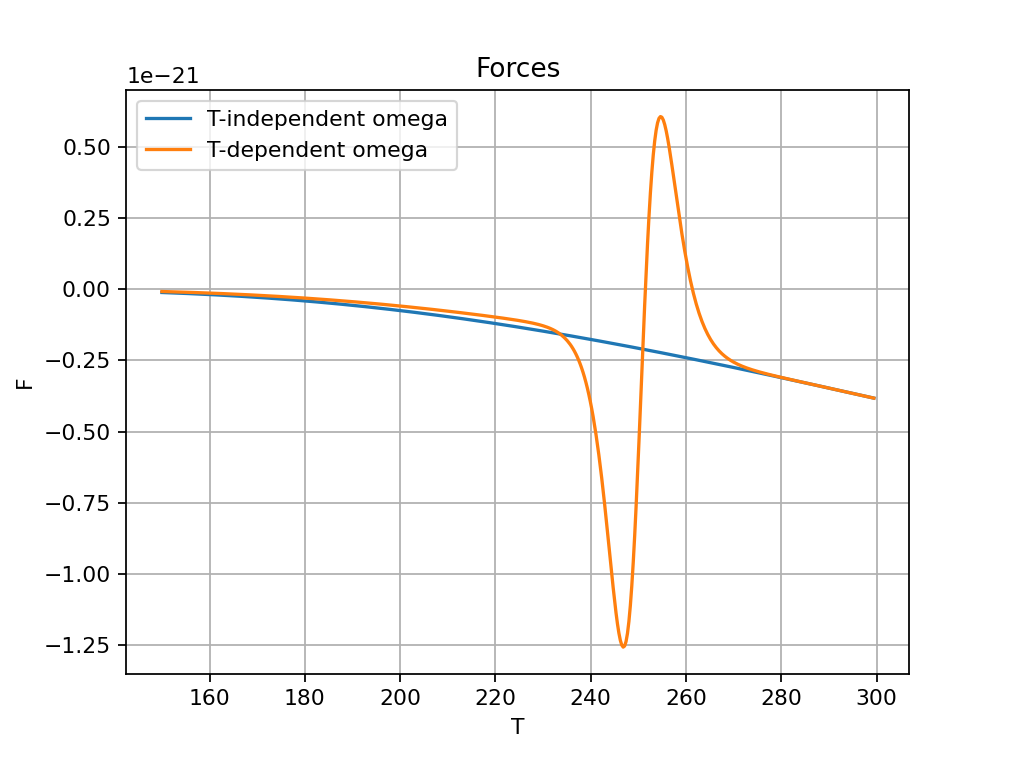

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [7]:
def sigmoid_function(sigmoid_arg):
    """ this function implements the sigmoid function """
    sigmoid = 1 - 1.0/(1.0 + np.exp(-sigmoid_arg))
    return sigmoid

def omega_sigmoid(omega_LT, omega_HT, T, T_transition, T_interval):
    sigmoid_arg = (T-T_transition)/T_interval    
    omega = sigmoid_function(sigmoid_arg)
    omegaarray = omega_HT+(omega_LT-omega_HT)*omega
    return omegaarray

# Getting the wavenumber as a function of T (or equivalently, x)
nubararray = []
for T in Tarray:
    nubararray = omega_sigmoid(nubar_LT, nubar_HT, Tarray, T_transition, T_interval)

# Converting to frequencies
nuarray = nubararray*c; nuarray.ito('1/s')
omegaarray = nuarray*(2*np.pi)
omega_LT = omegaarray[0]
omega_HT = omegaarray[-1]

# Plotting
plt.figure()
plt.plot(Tarray,nubararray)
plt.grid(True)
plt.xlabel('T')
plt.ylabel('wavenumber (cm^-1)')
plt.title('wavenumber')

# Getting Z(T)
Zarray_new = []
for i in range(len(Tarray)):
    T = Tarray[i]
    omega = omega_sigmoid(omega_LT, omega_HT, T, T_transition, T_interval) 
    Z = Z_HO(omega,T)
    Zarray_new = np.append(Zarray_new,Z)
plt.figure()
plt.semilogy(Tarray,Zarray-1,label='T-independent omega')
plt.semilogy(Tarray,Zarray_new-1,label='T-dependent omega')
plt.grid(True)
plt.xlabel('T (K)')
plt.ylabel('Z-1')
plt.title('Z-1')
plt.legend()

# Getting U(T)
lnZ = np.log(Zarray_new)
Uarray_new = kB*Tarray[:-1]**2*np.diff(lnZ)/np.diff(Tarray)
plt.figure()
plt.semilogy(Tarray[:-1],Uarray,label='T-independent omega')
plt.semilogy(Tarray[:-1],Uarray_new,label='T-dependent omega')
plt.grid(True)
plt.xlabel('T')
plt.ylabel('U')
plt.title('U')
plt.legend()

# Getting F(x)
Farray_new = -np.diff(Uarray_new)/np.diff(xarray[0:-1])
plt.figure()
plt.plot(Tarray[:-2],Farray,label='T-independent omega')
plt.plot(Tarray[:-2],Farray_new,label='T-dependent omega')
plt.grid(True)
plt.xlabel('T')
plt.ylabel('F')
plt.title('Forces')
plt.legend()

### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page